## Student Admission Prediction Project

### 1) Problem statement

- This project is created to predict Graduate Admissions on a Masters Program. It considers several parameters which are that are considered important during the application for Masters Programs.


### 2) Data Collection

Context
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

Content
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
University Rating ( out of 5 )
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 )

Acknowledgements
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
The dataset is owned by Mohan S Acharya.

Inspiration
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

Citation
Please cite the following if you are interested in using the dataset :
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019


### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn, XGboost, Metrics, LabelEncoder, StandardScaler, SMOTE

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder, StandardScaler

#### Import the CSV Data as Pandas DataFrame

In [2]:
data = pd.read_csv("Admission_Predict.csv")

#### Show Top 5 Records

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Shape of the dataset

In [4]:
data.shape

(400, 9)

### 2.2 Dataset information

- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df = pd.DataFrame(data)
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


#### Insight

- Higher GRE, TOEFL, CGPA, SOP, LOR scores, and research experience positively impact the chance of admission, which averages 72.4%. 
- Most students demonstrate strong academic profiles, with CGPAs around 8.6 and GRE scores near 317. These factors collectively explain their relatively high likelihood of admission.


### 3.7 Exploring Data

In [10]:
# Transform values in the 'Chance of Admit' column.
df['y'] = (df['Chance of Admit '] >= 0.75).astype(int)

df.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,y
226,227,306,110,2,3.5,4.0,8.45,0,0.63,0
123,124,308,108,3,3.5,3.5,8.22,0,0.61,0
86,87,315,106,3,4.5,3.5,8.42,0,0.72,0
217,218,321,109,4,4.0,4.0,9.13,1,0.85,1
67,68,316,107,2,3.5,3.5,8.64,1,0.57,0
305,306,321,109,3,3.5,3.5,8.80,1,0.74,0
262,263,308,103,2,2.5,4.0,8.36,1,0.70,0
208,209,305,106,2,3.0,3.0,8.16,0,0.64,0
53,54,324,112,4,4.0,2.5,8.10,1,0.72,0
300,301,309,106,2,2.5,2.5,8.00,0,0.62,0


In [11]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ', 'y'],
      dtype='object')

/tmp/ipykernel_46485/3091485823.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='viridis')


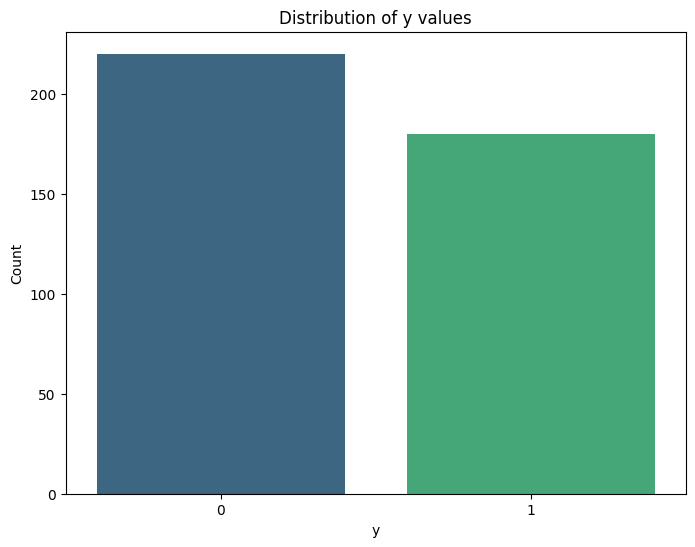

In [12]:
# Plot de la distribution des valeurs de 'y'
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df, palette='viridis')
plt.title('Distribution of y values')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()


### Target class is imbalance, where 0 the majority is more that 1 the minority

### 4. Exploring Data ( Visualization )

 ### 4.1 Visualization of relationships and distributions of variables with classes 0 and 1

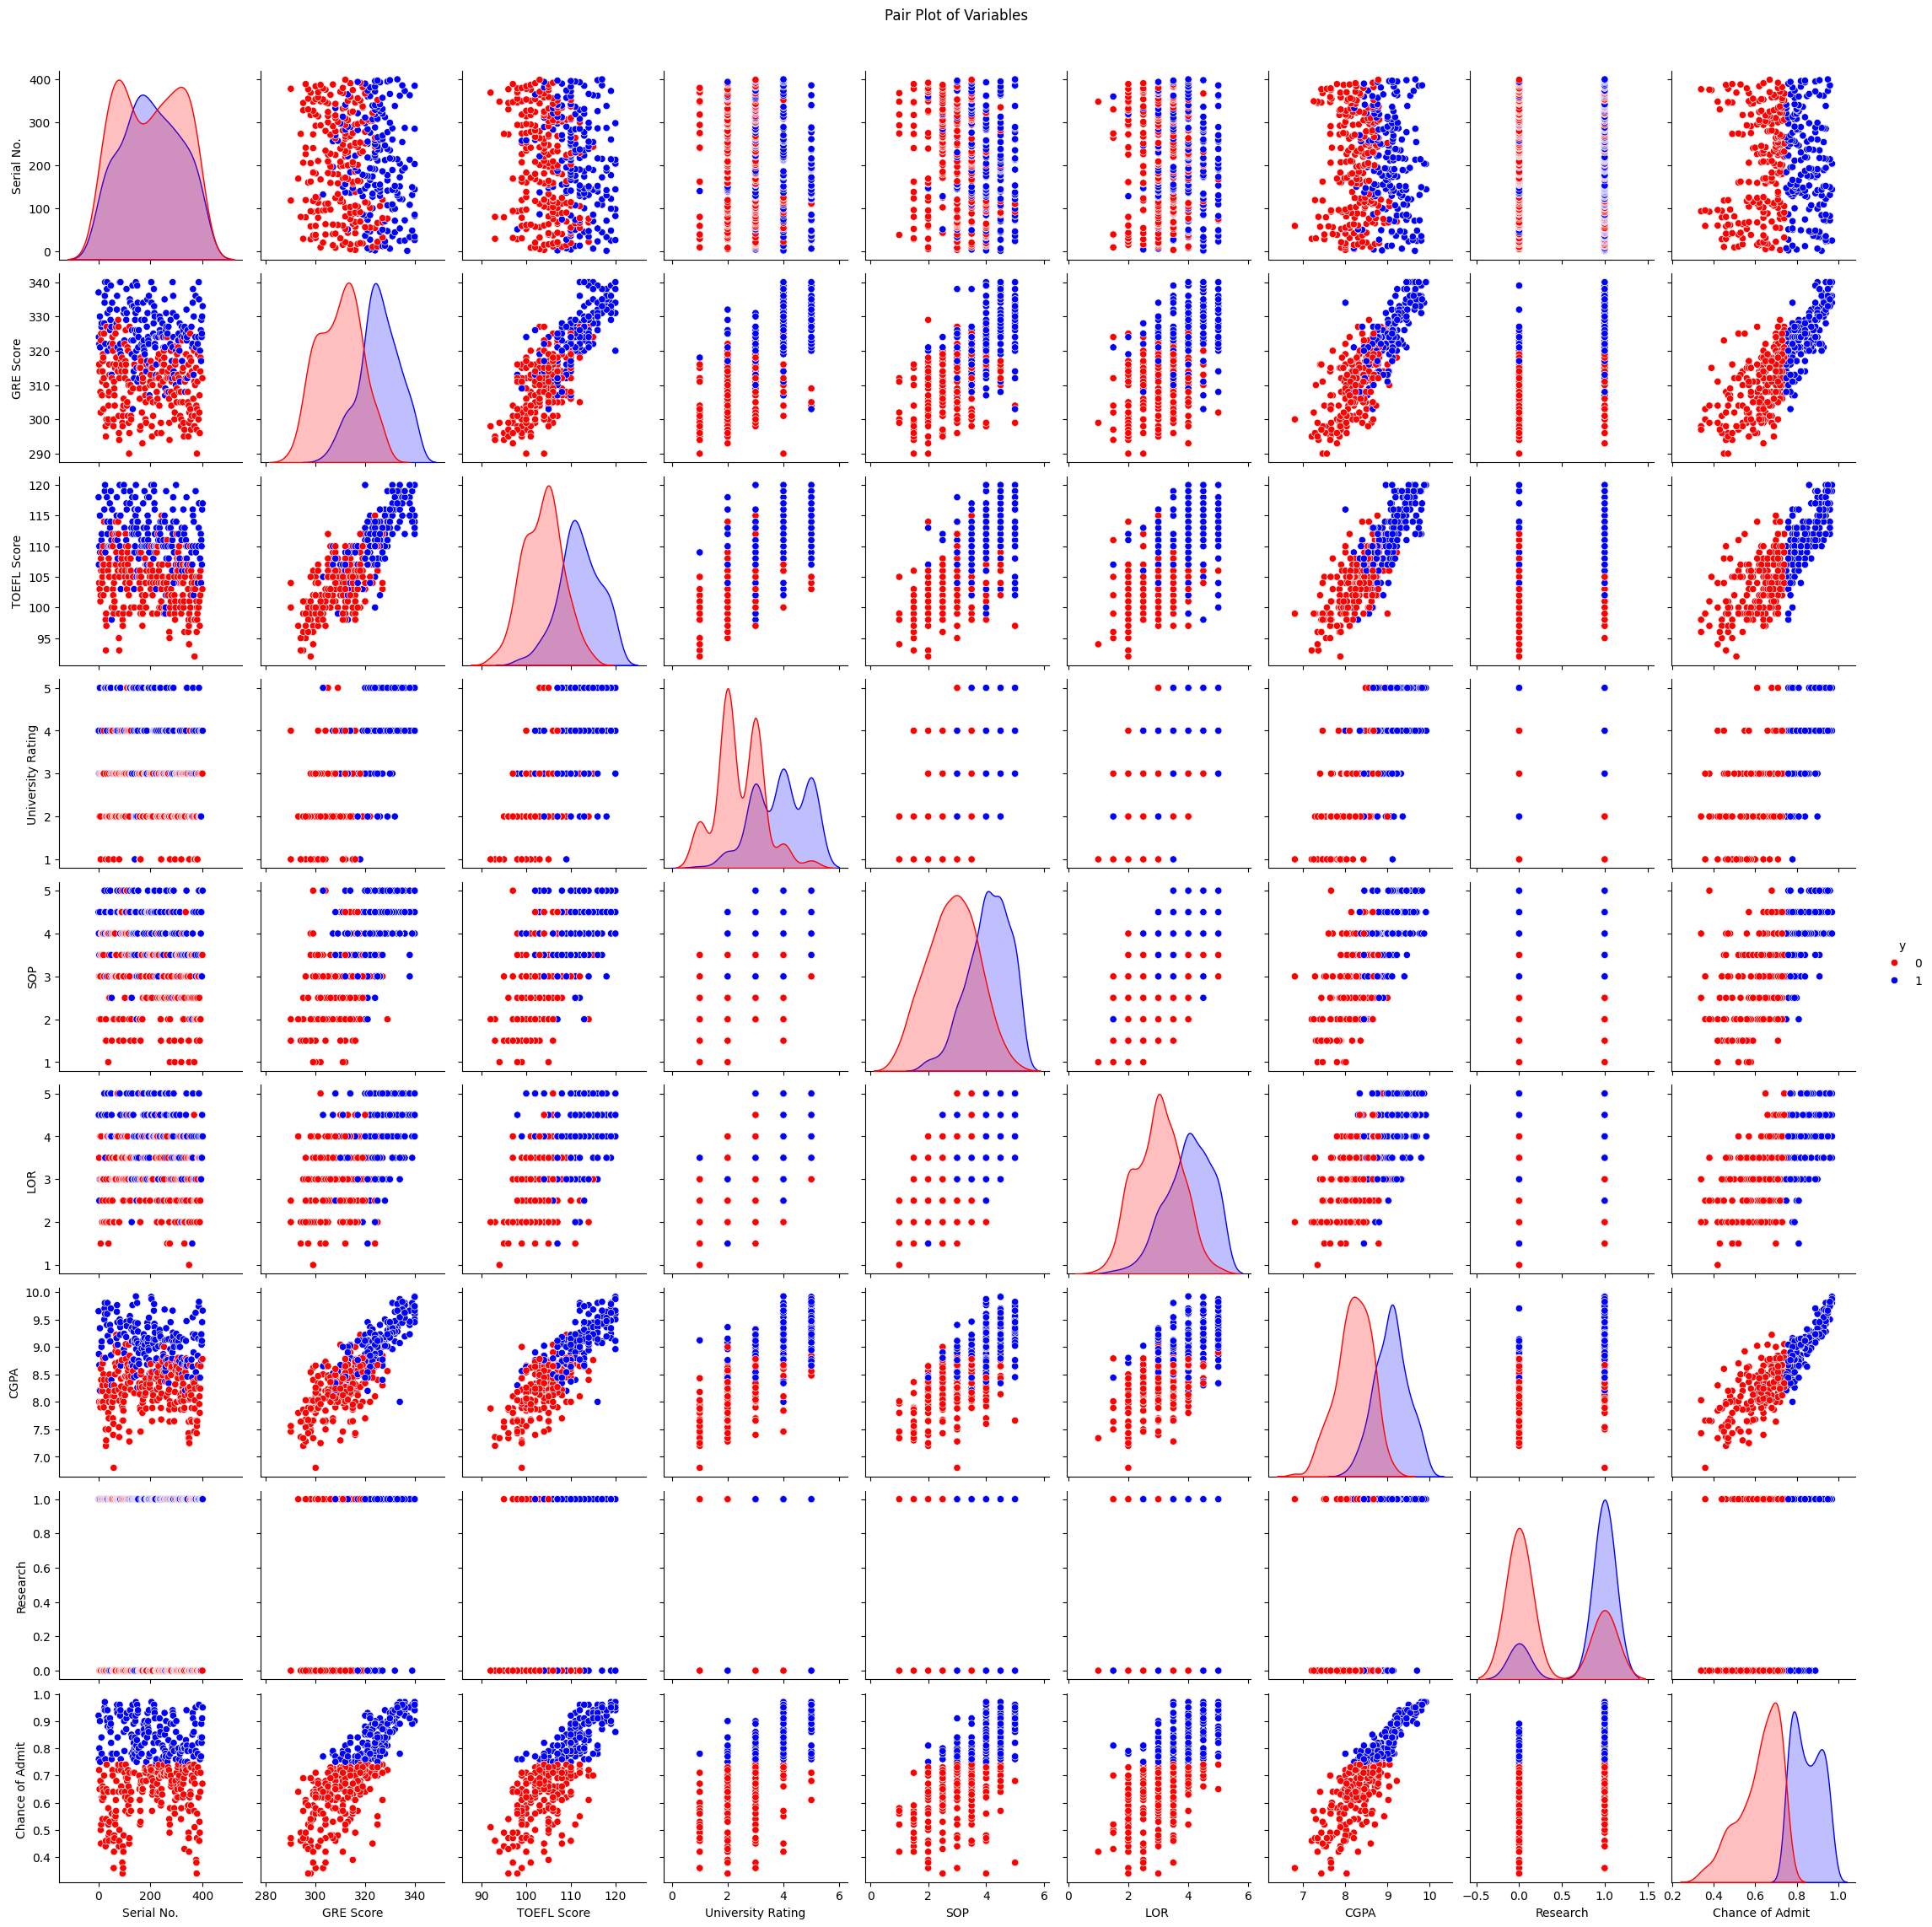

In [13]:
# Pair plot
sns.pairplot(df, hue='y', palette={0: 'red', 1: 'blue'})
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()

### Insights

- Strong positive correlations are visible between GRE Scores, TOEFL Scores, CGPA, and the Chance of Admit. These variables tend to cluster and align diagonally, indicating they are important predictors of admission chances

- The red (class 0) and blue (class 1) points show some separation across certain features like GRE Scores, TOEFL Scores, and CGPA. This suggests that higher values in these features are more associated with class 1 (higher chance of admission).

- CGPA is more skewed toward higher values, reflecting the strong academic background of the applicants.

- SOP and LOR exhibit less obvious trends and could show weak or non-linear relationships with the Chance of Admit.

- The Research variable (binary) divides the data clearly into two groups, where class 1 (blue) appears more concentrated among students with research experience.

### 5. Splitting X and Y

In [14]:
# Features and target
X = df.drop(['y', 'Chance of Admit '], axis=1)
feature_names = X.columns.tolist() #these will be used during XAI
y = df['y']
#Standardization
scaler = StandardScaler() 
X = scaler.fit_transform(X)


### 5.1. View X columns

### 5.2. Split data in train and test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 6. Model training

In [16]:
# Train the model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/home/student/miniconda3/envs/data_prep/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

### 6.1. Cross validation

In [17]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9


### Insights

- A good accuracy on test data show that model has generalized well

### 6.2. Confusion matrix

Confusion Matrix:
[[41  6]
 [ 2 31]]


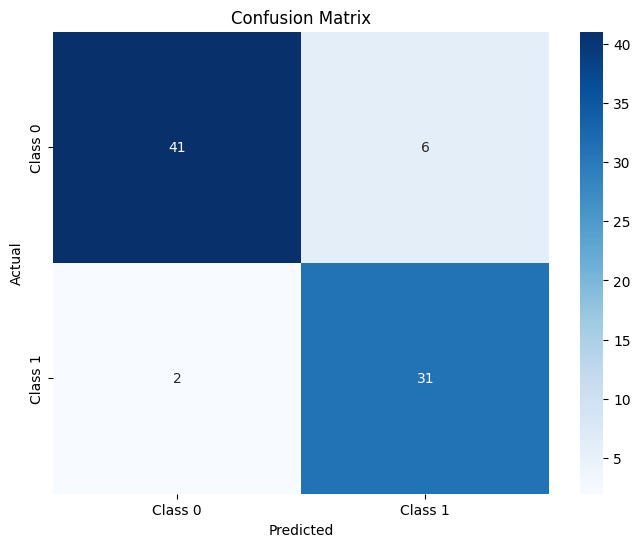

F1 Score: 0.8857142857142857


In [18]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')


### Insights

- True Negatives (TN) = 41: Correctly predicted class 0 as 0.
- False Positives (FP) = 6: Incorrectly predicted class 1 as 0.
- False Negatives (FN) = 2: Incorrectly predicted class 0 as 1.
- True Positives (TP) = 31: Correctly predicted class 1 as 1.

### 7. Hyperparameter tuning

Fitting 3 folds for each of 243 candidates, totalling 729 fits


/home/student/miniconda3/envs/data_prep/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/student/miniconda3/envs/data_prep/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/student/miniconda3/envs/data_prep/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/student/miniconda3/envs/data_prep/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:57:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/student/miniconda3/envs/data_p

Best hyperparameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.9
Confusion Matrix:
[[41  6]
 [ 2 31]]


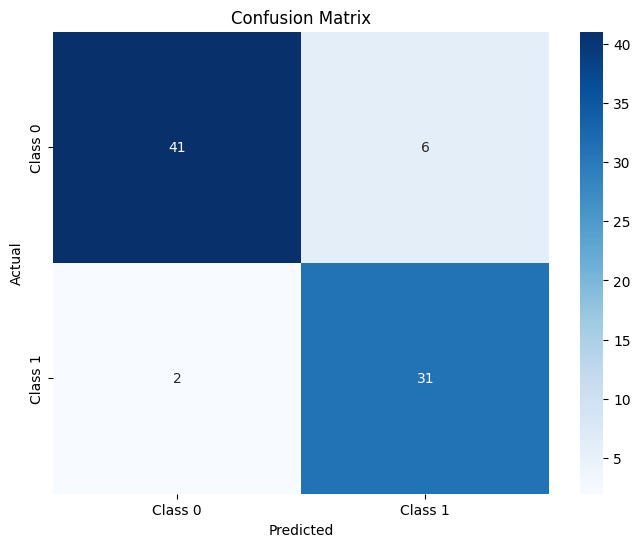

F1 Score: 0.8857142857142857


In [19]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Configure GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)

# Train GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')


### Insights

### Best Hyperparameters:
- colsample_bytree: 0.9
- learning_rate: 0.1
- max_depth: 3
- n_estimators: 100
- subsample: 0.8


### 8. SMOTE for oversampling

Distribution of 'y' before SMOTE:
y
0    173
1    147
Name: count, dtype: int64
Distribution of 'y' after SMOTE:
y
1    173
0    173
Name: count, dtype: int64


/tmp/ipykernel_46485/78733640.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette='viridis')


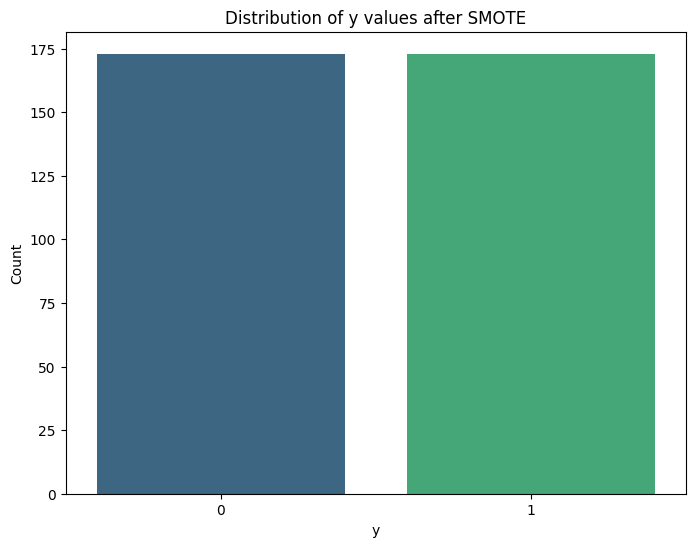

In [20]:
# Count the distribution of 'y' before applying SMOTE
print("Distribution of 'y' before SMOTE:")
print(y_train.value_counts())

# Applying SMOTE for oversampling the minority class in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Count the distribution of 'y' after applying SMOTE
print("Distribution of 'y' after SMOTE:")
print(y_train_smote.value_counts())

# Plotting the distribution of 'y' values after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_smote, palette='viridis')
plt.title('Distribution of y values after SMOTE')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()


### Insights

- **Before SMOTE**:  
  The dataset was imbalanced:  
  - Class 0: 173 samples  
  - Class 1: 147 samples  

- **After SMOTE**:  
  The dataset is balanced:  
  - Class 0: 173 samples  
  - Class 1: 173 samples  

- This shows SMOTE successfully oversampled the minority class (Class 1) to match the majority class (Class 0), ensuring a balanced dataset for training.


### Apply Shap

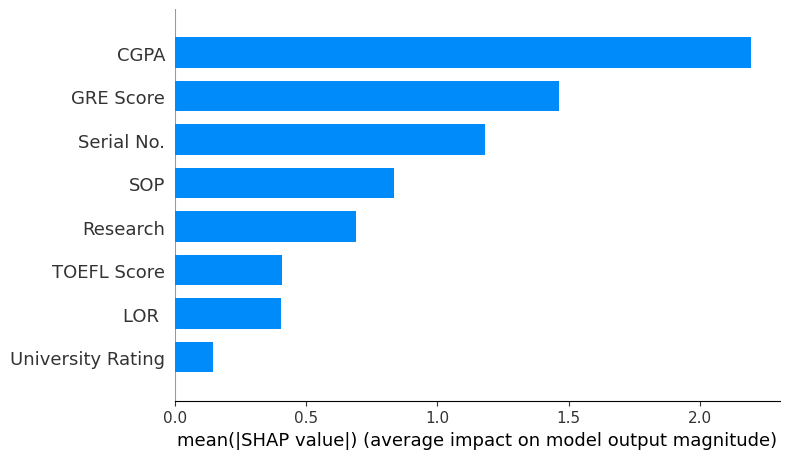

In [21]:
#  Add shap
import shap
import lime
import lime.lime_tabular
# Application de SHAP
explainer = shap.Explainer(model, X_train, feature_names=feature_names)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar")

# Application de LIME
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=feature_names,
    class_names=['Rejected', 'Admitted'], 
    discretize_continuous=True
)
# Expliquer une prédiction individuelle avec LIME
# index de l'instance à expliquer
i = 0 
exp = explainer_lime.explain_instance(X_test[i], model.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True)



### Feature Importance: 
#### The features are ranked by their importance (average impact on the model's output).
    - Feature 6 has the highest impact on the predictions.
    - Feature 1 and Feature 0 also have significant impacts.

LIME provides a local explanation for a specific prediction (instance i = 0). The explanation breaks down the contributions of different features to the predicted probability of each class (Rejected or Admitted).

Prediction Probabilities: 
The model predicted a 100% probability for "Rejected" and 0% for "Admitted" for this instance.

Feature Contributions:
For "Rejected" (blue): CGPA (-0.80) and GRE Score (-1.38) are the most influential features contributing to the "Rejected" prediction.
For "Admitted" (orange): Research (0.91), SOP (0.10), and LOR (0.61) slightly support the "Admitted" class but not enough to change the overall prediction.

## --------------------------THE END ---------------------------------

#### What next!!!!

Consider diverse dataset with more feature